# Waterfilling Levels

In [30]:
import warnings;
warnings.filterwarnings('ignore');

import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import food_bank_functions
import food_bank_bayesian
import matplotlib.pyplot as plt
import seaborn as sns
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)

<module 'food_bank_functions' from '../../functions/food_bank_functions.py'>

In [3]:
np.random.seed(1)

### Test

In [4]:
n = 6
sorted_distribution = np.asarray([np.arange(2) + 1 for x in range(n)])
weights = np.asarray([np.zeros(2)+0.5 for x in range(n)])
median = np.zeros(n)+1.5
variance = np.zeros(n) + .25
delta = np.zeros(n) + .1

expected_demand = 1.5
max_budget = n * expected_demand

In [5]:
print(median)

[1.5 1.5 1.5 1.5 1.5 1.5]


In [6]:
print(max_budget)

9.0


In [7]:
group_demands = [2, 1, 1, 1, 2, 1]

In [8]:
print(waterfilling_waste(group_demands, max_budget))

[2. 1. 1. 1. 2. 1.]


In [9]:
print(greedy(group_demands, max_budget))

[2. 1. 1. 1. 2. 1.]


In [10]:
print(constant_threshold(group_demands,max_budget,expected_demand))

[1.5 1.  1.  1.  1.5 1. ]


In [11]:
print(waterfilling_proportional_remaining(group_demands, max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [12]:
print(waterfilling_et_waste([1.5, 1.5, 1.5, 1.5, 1.5, 1.5],group_demands,max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [13]:
print(waterfilling_et_full_waste([1.5, 1.5, 1.5, 1.5, 1.5, 1.5],group_demands,max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [14]:
print(waterfilling_hope_waste_iid([1/2, 1/2], [1, 2], group_demands, max_budget))

[1.85714286 1.         1.         1.         2.         1.        ]


In [15]:
print(waterfilling_hope_full_waste_iid([1/2, 1/2], [1, 2], group_demands, max_budget))

[1.85714286 1.         1.         1.         2.         1.        ]


In [16]:
print(max_budget)

9.0


In [17]:
print(max_min_heuristic(group_demands, median, [1.5, 1.5, 1.5, 1.5, 1.5, 1.5], variance, max_budget))

[1.71428571 0.85714286 0.85714286 0.85714286 1.71428571 1.        ]


In [18]:
print(max_budget)

9.0


In [19]:
np.asarray(group_demands) - 1

array([1, 0, 0, 0, 1, 0])

# Experiments

## Varying Number of Groups

In [38]:
num_iterations = 1000
max_n = 100
sorted_distribution = [1, 2]
weights = [1,2]
expected_demand = np.dot([1,2],[1/2, 1/2])
max_budget = max_n*expected_demand

In [39]:
expected_waterfilling_threshold = np.zeros(max_n+1)
num_iterations = 100
for i in np.arange(2
                   , max_n+1):
    for _ in range(num_iterations):
        budget = i * 1.5
        demands = np.random.choice(size=i, a=[1.,2.], p=[1/2, 1/2])
        opt = waterfilling_waste(demands, budget)
        expected_waterfilling_threshold[i] += (1/num_iterations)*max(opt)
print(expected_waterfilling_threshold)

[0.         0.         1.695      1.7175     1.86166667 1.85625
 1.8505     1.848      1.90704762 1.93155357 1.9009127  1.92380952
 1.92161905 1.90207774 1.90742424 1.91768939 1.91310334 1.93825058
 1.92826823 1.93903022 1.93629995 1.94630944 1.94079075 1.93867972
 1.93765871 1.93124129 1.93087165 1.93977692 1.94972867 1.93735904
 1.9303682  1.94484668 1.94633214 1.94055037 1.9368871  1.93970757
 1.94449337 1.9461977  1.93743604 1.94036353 1.93201408 1.93337409
 1.94442377 1.95217344 1.95163146 1.95314886 1.95067844 1.94295829
 1.95123235 1.94914108 1.94969429 1.95080986 1.94910874 1.95725412
 1.95303579 1.95282418 1.95140515 1.94611528 1.95335116 1.94785571
 1.95668945 1.95730729 1.94494089 1.95279459 1.96458082 1.95367191
 1.95318875 1.96530863 1.95536137 1.96136362 1.9572708  1.96522158
 1.95501084 1.95622258 1.95108634 1.96193906 1.96508816 1.95854711
 1.96108898 1.96428392 1.97027205 1.95331249 1.95893145 1.96295175
 1.94949087 1.95858797 1.96111698 1.95867298 1.96955484 1.9575245

In [22]:
print(weights)

[1, 2]


### Look at scaling with n

In [41]:
data_dict = {'NumGroups':[], 'Norm':[], 'ET_Online':[],'Hope_Online':[], 'Adapt_Threshold':[], 'Threshold':[], 'Expected_Filling':[], 'Greedy':[], 'ET_Full':[], 'Hope_Full':[], 'Max_Min':[]}
num_iterations = 100

for n in np.arange(2,max_n+1):
    n = max(int(n),1)
    group_expected_demands = np.zeros(n) + 1.5
    group_median_demands = np.zeros(n) + 1
    group_variance = np.zeros(n) + 0.25
    
    budget = n*1.5
    print(n)
    for i in range(num_iterations):
        
        data_dict['NumGroups'].append(n)
        
        group_demands = np.random.choice(size=n, a=[1.,2.], p=[1/2, 1/2])
        opt = waterfilling_waste(group_demands,budget)
     
        hope_sol = waterfilling_hope_waste_iid([1/2, 1/2], [1, 2], group_demands, budget)
        hope_full_sol = waterfilling_hope_full_waste_iid([1/2, 1/2], [1, 2], group_demands, budget)
        dynamic = waterfilling_et_waste(group_expected_demands,group_demands,budget)
        et_full = waterfilling_et_full_waste(group_expected_demands, group_demands, budget)
        proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
        greed_sol = greedy(group_demands,budget)
        threshold = constant_threshold(group_demands,budget,expected_demand)
        expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n] - (1 / np.sqrt(n)))
        max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)
      
        
        data_dict['Norm'].append('L1')
        data_dict['Hope_Online'].append(np.sum(np.absolute(opt - hope_sol)))
        data_dict['ET_Online'].append(np.sum(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.sum(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.sum(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.sum(np.absolute(opt-threshold)))
        data_dict['ET_Full'].append(np.sum(np.absolute(opt-et_full)))
        data_dict['Hope_Full'].append(np.sum(np.absolute(opt-hope_full_sol)))
        data_dict['Expected_Filling'].append(np.sum(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min'].append(np.sum(np.absolute(opt-max_min_heuristic_sol)))

        data_dict['NumGroups'].append(n)
        data_dict['Norm'].append('Linf')
        data_dict['Hope_Online'].append(np.max(np.absolute(opt - hope_sol)))
        data_dict['ET_Online'].append(np.max(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.max(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.max(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.max(np.absolute(opt-threshold)))
        data_dict['ET_Full'].append(np.max(np.absolute(opt-et_full)))
        data_dict['Hope_Full'].append(np.max(np.absolute(opt-hope_full_sol)))
        data_dict['Expected_Filling'].append(np.max(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min'].append(np.max(np.absolute(opt-max_min_heuristic_sol)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [42]:
df = pd.DataFrame(data_dict).melt(id_vars=["NumGroups", 'Norm'])

In [43]:
df.to_csv('scale_with_n.csv')

In [44]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [45]:
df.head

<bound method NDFrame.head of         NumGroups  Norm   variable     value
0               2    L1  ET_Online  0.500000
1               2  Linf  ET_Online  0.500000
2               2    L1  ET_Online  0.000000
3               2  Linf  ET_Online  0.000000
4               2    L1  ET_Online  0.500000
...           ...   ...        ...       ...
178195        100  Linf    Max_Min  0.000000
178196        100    L1    Max_Min  0.000000
178197        100  Linf    Max_Min  0.000000
178198        100    L1    Max_Min  2.742399
178199        100  Linf    Max_Min  0.046837

[178200 rows x 4 columns]>

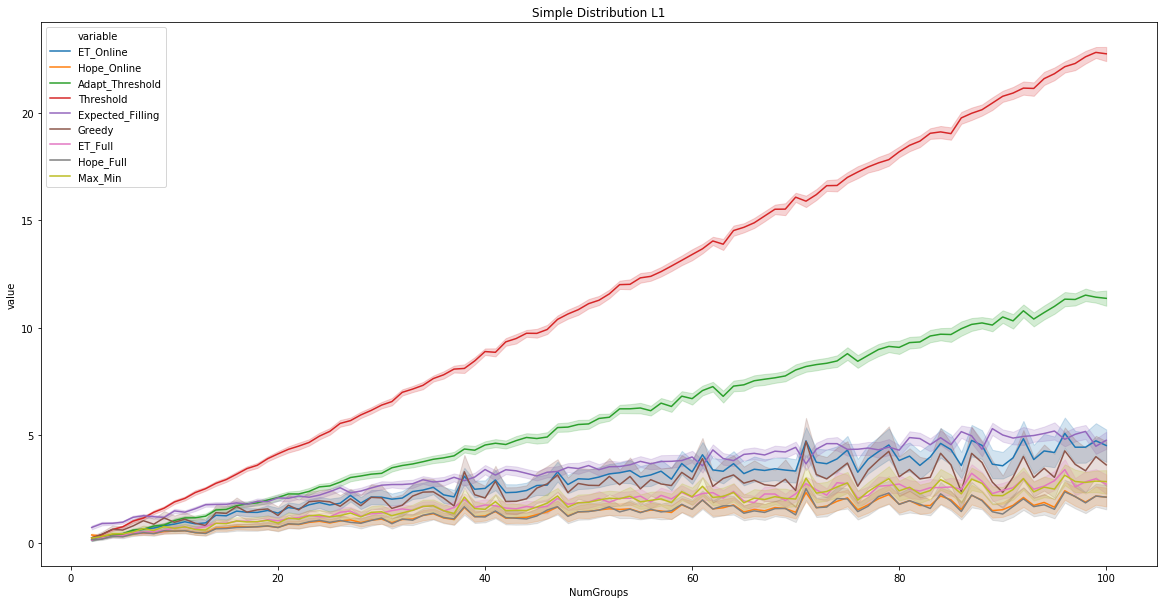

In [46]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Simple Distribution L1')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'L1'])

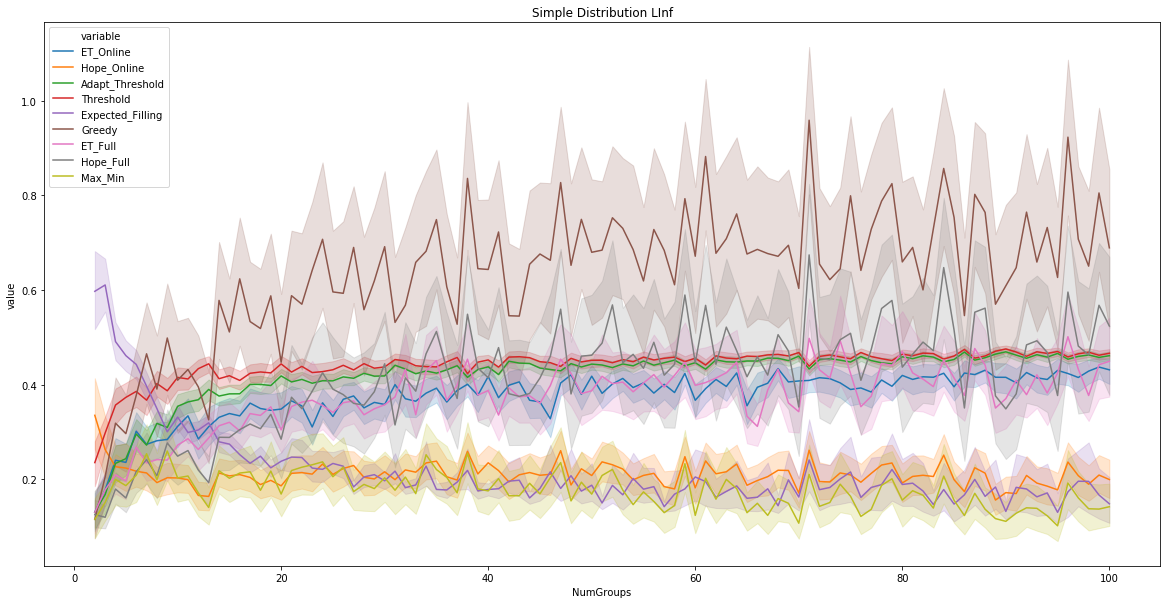

In [47]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Simple Distribution LInf')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'Linf'])

In [29]:
data_dict = {'Group':[], 'Hope_Full':[], 'Hope_Online':[],'ET_Full':[], 'ET_Online':[], 'True':[], 'Max_Min':[]}
data_dict_budget = {'Group':[], 'Hope_Full':[], 'Hope_Online':[],'ET_Full':[], 'ET_Online':[], 'True':[], 'Max_Min':[], 'ET_Full_Hindsight':[], 'Hope_Full_Hindsight':[]}
num_iterations = 100





for i in range(num_iterations):
    
    max_n = 100
    
    weights = [1/2, 1/2]
    sorted_support = [1., 2.]
    expected_demands = [1.5 for x in range(max_n)]
    median_demands = [1. for _ in range(max_n)]
    variance = [.25 for _ in range(max_n)]
    
    
    # print(weights)
    # print(sorted_support)
    # print(expected_demands)
    max_budget = max_n*1.5
    
    
    
    group_demands = np.random.choice(size=max_n, a=sorted_support, p=weights).astype(np.float)
    print('Demands for experiment:' + str(group_demands))   
    
    et_full = np.copy(expected_demands)
    et_online = np.sort(np.copy(expected_demands))
    
    et_online_budget = max_budget
    hope_online_budget = max_budget

    hope_online_support = np.copy(sorted_support)
    hope_online_vals = np.copy(weights)*max_n
    hope_full_vals_history = np.copy(weights)*0
    
    
    hope_full_support = np.copy(sorted_support)
    hope_full_vals = np.copy(weights)*max_n


    max_min_budget = max_budget
    min_fill = 1.
    
    true_budget = max_budget
    et_full_budget = max_budget
    hope_full_budget = max_budget
    


    
    for n in range(max_n):
        # Solve for the various waterfilling levels and budgets
        
        data_dict['Group'].append(n)
        data_dict_budget['Group'].append(n)
        
        # OFFLINE
        
        # Computes Offline Optimal in hindsight
        off_opt = waterfilling(np.copy(group_demands), max_budget)
        
        # Calculates the budget remaining to this point
        true_budget -= off_opt[n] 
        
        # Appends the waterfilling level
        data_dict['True'].append(min(max(off_opt), max_budget))
        data_dict_budget['True'].append(true_budget)
        
        
        # ET FULL
        
        # Replaces current town's demand with realized demand
        et_full[n] = group_demands[n]
    
        # Sorts demands
        et_full_sorted = np.sort(np.copy(et_full))
        # and gets their original indexes
        orig_index = np.argsort(np.copy(et_full))
        
        # Determines the location of the current location's demand in sorted matrix
        index = np.argmin(np.abs(et_full_sorted - group_demands[n]))
        
        # Appends maximum allocation based on full demand with full budget
        et_full_sol = waterfilling_sorted(et_full_sorted, max_budget)
        et_full_budget -= min(et_full_sol[index], group_demands[n], et_full_budget)
        
        data_dict['ET_Full'].append(min(max(et_full_sol), et_full_budget))
        data_dict_budget['ET_Full'].append(et_full_budget)
        data_dict_budget['ET_Full_Hindsight'].append(max_budget - np.sum(et_full_sol[orig_index[0:n]]))
            
        # ET ONLINE
        
        # Removes expected demand for current agent from list
        et_online = delete_sorted(et_online, expected_demands[n])
        
        # adds in the demand for current location
        new_sorted_list, index = insert_sorted(et_online, group_demands[n])
        tmp_sol = waterfilling_sorted(new_sorted_list, et_online_budget)
        data_dict['ET_Online'].append(max(tmp_sol))
        # subtracts off the allocation for the next round
        et_online_budget -= min(tmp_sol[index], et_online_budget, group_demands[n])
        data_dict_budget['ET_Online'].append(et_online_budget)
        
        # HOPE FULL
        
        # Updating the weights for the observed group
        obs_demand = group_demands[n]
        
        # Gets location of current demand
        index = np.argmin(np.abs(hope_full_support - obs_demand))
        
        # Update Weights
        hope_full_vals -= weights
        hope_full_vals[index] += 1
        
        # Calculates solution
        hope_full_sol = waterfilling_sorted_weights(hope_full_support, hope_full_vals, max_budget)
        
        # Updates budget
        hope_full_budget -= min(hope_full_sol[index], group_demands[n], hope_full_budget)
        data_dict['Hope_Full'].append(max(waterfilling_sorted_weights(hope_full_support, hope_full_vals, max_budget)))
        data_dict_budget['Hope_Full'].append(hope_full_budget)
        
        # Uses full historical data to get hindsight budget
        hope_full_vals_history[index] += 1        
        data_dict_budget['Hope_Full_Hindsight'].append(max_budget - np.dot(hope_full_sol, hope_full_vals_history))
        
        
        
        # HOPE ONLINE
        obs_demand = group_demands[n]
        
        # Updates weights
        index = np.argmin(np.abs(hope_online_support - obs_demand))
        hope_online_vals -= weights
        hope_online_vals[index] += 1        

        
        
        tmp_sol = waterfilling_sorted_weights(hope_online_support, hope_online_vals, hope_online_budget)
        hope_online_budget -= min(obs_demand, hope_online_budget, tmp_sol[index])
        
        hope_online_vals[index] -= 1
        data_dict['Hope_Online'].append(max(tmp_sol))
        data_dict_budget['Hope_Online'].append(hope_online_budget)
        
        
        # Max_Min
        
        if n == max_n - 1:
            data_dict['Max_Min'].append(min(max_min_budget, group_demands[n]))
            data_dict_budget['Max_Min'].append(max_min_budget - min(max_min_budget, group_demands[n]))
        else:
            delta = (median_demands[n] - median_demands[n+1]) / ((1/2)* (median_demands[n] + median_demands[n+1]))
            budget_portion = max_min_budget * (expected_demands[n] + expected_demands[n+1]) / np.sum(expected_demands[n:])
            heuristic_threshold = budget_portion * (group_demands[n] / (group_demands[n] + median_demands[n+1] + delta * np.sqrt(variance[n+1])))
            allocation = min(heuristic_threshold, min_fill*group_demands[n], max_min_budget)
            data_dict['Max_Min'].append(heuristic_threshold)
            
            if allocation / group_demands[n] <= min_fill:
                min_fill = allocation / group_demands[n]
            max_min_budget -= allocation
            data_dict_budget['Max_Min'].append(max_min_budget)
            

Demands for experiment:[1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2.
 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2.
 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1.
 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1.
 1. 1. 1. 2.]
Demands for experiment:[1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1.
 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2.
 1. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2.
 1. 2. 2. 2.]
Demands for experiment:[2. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1.
 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1.
 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1.
 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2.
 1. 2. 1. 1.]
Demands for e

Demands for experiment:[2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1.
 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1.
 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1.
 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 2.]
Demands for experiment:[1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1.
 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1.
 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2.
 2. 1. 1. 2.]
Demands for experiment:[2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2.
 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1.
 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1.
 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2.
 1. 1. 1. 1.]
Demands for e

Demands for experiment:[2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 1. 1.
 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1. 1.
 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1.
 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1.
 1. 2. 1. 2.]
Demands for experiment:[1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1.
 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1.
 2. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1.
 1. 2. 1. 1.]
Demands for experiment:[1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1.
 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 1. 2. 2.]
Demands for e

Demands for experiment:[1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2.
 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2.
 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1.
 1. 2. 2. 2.]
Demands for experiment:[2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1.
 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1.]
Demands for experiment:[2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1.
 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1.
 1. 2. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1.
 2. 1. 1. 1.]
Demands for e

In [30]:
np.std(data_dict['True'])

0.05136867358022103

In [31]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

### Waterfilling Comparison

In [32]:
df = pd.DataFrame(data_dict).melt(id_vars="Group")

In [33]:
df.to_csv('comparison_of_waterfilling_levels.csv')

Text(0.5,0,'Estimated Level')

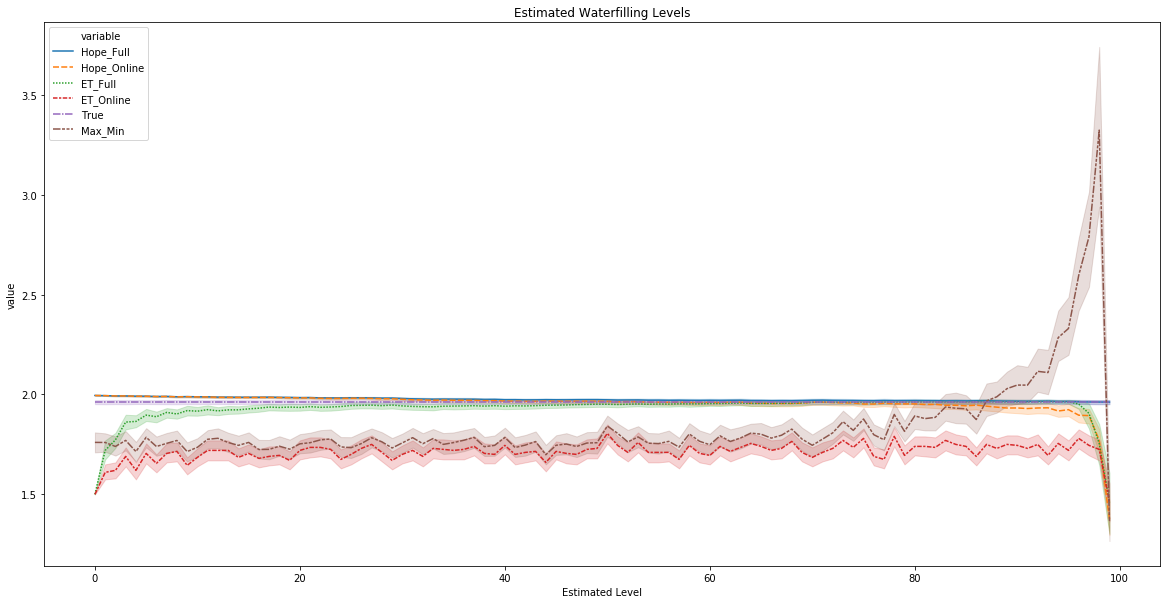

In [34]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', style='variable', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')

### Budget Comparison

In [35]:
df = pd.DataFrame(data_dict_budget).melt(id_vars="Group")

In [36]:
df.to_csv('comparison_of_budgets.csv')

Text(0.5,0,'Estimated Level')

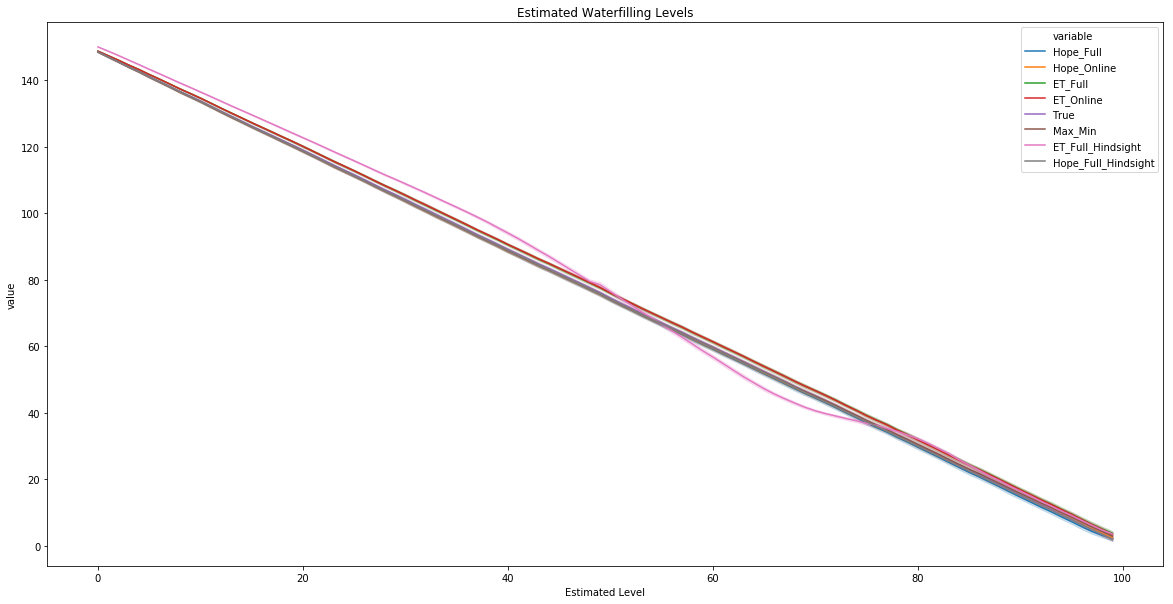

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')

### Calculating Fairness Statistics


In [38]:
num_iterations = 1000
weights = [1/2, 1/2]
sorted_distribution = [1., 2.]
expected_demand = np.dot(weights, sorted_distribution)
n=100

In [39]:
group = np.arange(n)
group_expected_demands = np.zeros(n) + expected_demand
budget = expected_demand*n
score_hope_online = np.zeros((n,num_iterations))
score_hope_full = np.zeros((n,num_iterations))
score_et_online = np.zeros((n,num_iterations))
score_et_full = np.zeros((n,num_iterations))
score_greedy = np.zeros((n,num_iterations))
score_adapt_threshold = np.zeros((n,num_iterations))
score_fixed_threshold = np.zeros((n,num_iterations))
score_expect_threshold = np.zeros((n,num_iterations))
score_max_min = np.zeros((n, num_iterations))

# 8 different algorithms
env = np.zeros((11,num_iterations))
po = np.zeros((11,num_iterations))
prop = np.zeros((11,num_iterations))
linf = np.zeros((11,num_iterations))
l1 = np.zeros((11, num_iterations))
max_min = np.zeros((11, num_iterations))

for i in range(num_iterations):
    budget = n*np.dot(weights, sorted_distribution)

        
    group_demands = np.random.choice(size=n, a=sorted_distribution, p=weights)
    
    group_median_demands = np.zeros(n) + 1.
    group_variance = np.zeros(n) + 0.25
    delta = np.zeros(n) + .1
    
    opt = waterfilling_waste(group_demands,budget)

    hope_sol = waterfilling_hope_waste_iid(weights, sorted_distribution, group_demands, budget)
    hope_full_sol = waterfilling_hope_full_waste_iid(weights, sorted_distribution, group_demands, budget)
    dynamic = waterfilling_et_waste(group_expected_demands,group_demands,budget)
    et_full = waterfilling_et_full_waste(group_expected_demands, group_demands, budget)
    proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
    greedy_sol = greedy(group_demands,budget)
    threshold = constant_threshold(group_demands,budget,expected_demand)
    expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
    max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)

    # comparing hope_online
    
    score_hope_online[:,i] = opt - hope_sol
    env[0,i] = max(0,np.amax(envy_utility(hope_sol,group_demands)))
    po[0,i] = excess(hope_sol,budget)
    prop[0,i] = np.amax(proportionality_utility(hope_sol,group_demands,budget))
    max_min[0,i] = np.min(utility_ratio(hope_sol, group_demands, budget))
    linf[0,i] = np.amax(np.abs(score_hope_online[:,i]))
    l1[0,i] = np.sum(np.abs(score_hope_online[:,i]))
    
    
    # comparing hope_full
    
    score_hope_full[:,i] = opt - hope_full_sol
    env[1,i] = max(0,np.amax(envy_utility(hope_full_sol,group_demands)))
    po[1,i] = excess(hope_full_sol,budget)
    prop[1,i] = np.amax(proportionality_utility(hope_full_sol,group_demands,budget))
    max_min[1,i] = np.min(utility_ratio(hope_full_sol, group_demands, budget))
    linf[1,i] = np.amax(np.abs(score_hope_full[:,i]))
    l1[1,i] = np.sum(np.abs(score_hope_full[:,i]))    
    
    # comparing et_online
    
    score_et_online[:,i] = opt - dynamic
    env[2,i] = max(0,np.amax(envy_utility(dynamic,group_demands)))
    po[2,i] = excess(dynamic,budget)
    prop[2,i] = np.amax(proportionality_utility(dynamic,group_demands,budget))
    max_min[2,i] = np.min(utility_ratio(dynamic, group_demands, budget))
    linf[2,i] = np.amax(np.abs(score_et_online[:,i]))
    l1[2,i] = np.sum(np.abs(score_et_online[:,i]))       
    
    # comparing et_full
    
    score_et_full[:,i] = opt - et_full
    env[3,i] = max(0,np.amax(envy_utility(et_full,group_demands)))
    po[3,i] = excess(et_full,budget)
    prop[3,i] = np.amax(proportionality_utility(et_full,group_demands,budget))
    max_min[3,i] = np.min(utility_ratio(et_full, group_demands, budget))
    linf[3,i] = np.amax(np.abs(score_et_full[:,i]))
    l1[3,i] = np.sum(np.abs(score_et_full[:,i]))     
    
    # comparing greedy
    
    score_greedy[:,i] = opt - greedy_sol
    env[4,i] = max(0,np.amax(envy_utility(greedy_sol,group_demands)))
    po[4,i] = excess(greedy_sol,budget)
    prop[4,i] = np.amax(proportionality_utility(greedy_sol,group_demands,budget))
    max_min[4,i] = np.min(utility_ratio(greedy_sol, group_demands, budget))
    linf[4,i] = np.amax(np.abs(score_greedy[:,i]))
    l1[4,i] = np.sum(np.abs(score_greedy[:,i])) 
    
    # comparing fixed_threshold
    
    score_fixed_threshold[:,i] = opt - threshold
    env[5,i] = max(0,np.amax(envy_utility(threshold,group_demands)))
    po[5,i] = excess(threshold,budget)
    prop[5,i] = np.amax(proportionality_utility(threshold,group_demands,budget))
    max_min[5,i] = np.min(utility_ratio(threshold, group_demands, budget))
    linf[5,i] = np.amax(np.abs(score_fixed_threshold[:,i])    )
    l1[5,i] = np.sum(np.abs(score_fixed_threshold[:,i]))     
    
    # comparing adaptive_threshold
    
    score_adapt_threshold[:,i] = opt - proportional_threshold
    env[6,i] = max(0,np.amax(envy_utility(proportional_threshold,group_demands)))
    po[6,i] = excess(proportional_threshold,budget)
    prop[6,i] = np.amax(proportionality_utility(proportional_threshold,group_demands,budget))
    max_min[6,i] = np.min(utility_ratio(proportional_threshold, group_demands, budget))
    linf[6,i] = np.amax(np.abs(score_adapt_threshold[:,i]))    
    l1[6,i] = np.sum(np.abs(score_adapt_threshold[:,i]))   
    
    # comparing expected_threshold
    
    score_expect_threshold[:,i] = opt - expect_threshold
    env[7,i] = max(0,np.amax(envy_utility(expect_threshold,group_demands)))
    po[7,i] = excess(expect_threshold,budget)
    prop[7,i] = np.amax(proportionality_utility(expect_threshold,group_demands,budget))
    max_min[7,i] = np.min(utility_ratio(expect_threshold, group_demands, budget))
    linf[7,i] = np.amax(np.abs(score_expect_threshold[:,i]))
    l1[7,i] = np.sum(np.abs(score_expect_threshold[:,i]))    

    # comparing max_min_heurstic
    
    score_max_min[:,i] = opt - max_min_heuristic_sol
    env[8,i] = max(0,np.amax(envy_utility(max_min_heuristic_sol,group_demands)))
    po[8,i] = excess(max_min_heuristic_sol,budget)
    prop[8,i] = np.amax(proportionality_utility(max_min_heuristic_sol,group_demands,budget))
    max_min[8,i] = np.min(utility_ratio(max_min_heuristic_sol, group_demands, budget))
    linf[8,i] = np.amax(np.abs(score_max_min[:,i]))
    l1[8,i] = np.sum(np.abs(score_max_min[:,i]))    
    

In [40]:
score_hope_online = np.average(score_hope_online, axis=1)
score_hope_full = np.average(score_hope_full, axis=1)
score_et_online = np.average(score_et_online, axis=1)
score_et_full = np.average(score_et_full, axis=1)
score_greedy = np.average(score_greedy, axis=1)
score_adapt_threshold = np.average(score_adapt_threshold, axis=1)
score_fixed_threshold = np.average(score_fixed_threshold, axis=1)
score_expect_threshold = np.average(score_expect_threshold, axis=1)
score_max_min = np.average(score_max_min, axis=1)


env_std = np.std(env, axis=1)
po_std = np.std(po, axis=1)
prop_std = np.std(prop, axis=1)
linf_std = np.std(linf, axis=1)
max_min_std = np.std(max_min, axis=1)
l1_std = np.std(l1, axis=1)

env = np.average(env,axis=1)
po = np.average(po,axis=1)
prop = np.average(prop,axis=1)
linf = np.average(linf,axis=1)
l1 = np.average(l1, axis=1)
max_min = np.average(max_min, axis=1)

In [41]:
print('hope_online, hope_full, et_online, et_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min')
print('envy:')
print(env)
print(env_std * 1.96 / np.sqrt(num_iterations))
print('po')
print(po)
print(po_std * 1.96 / np.sqrt(num_iterations))
print('prop')
print(prop)
print(prop_std * 1.96 / np.sqrt(num_iterations))
print('sum')
print(env+po+prop)
print('max_min')
print(max_min)
print(max_min_std * 1.96 / np.sqrt(num_iterations))
print('linf')
print(linf)
print(linf_std * 1.96 / np.sqrt(num_iterations))
print('l1')
print(l1)
print(l1_std * 1.96 / np.sqrt(num_iterations))

hope_online, hope_full, et_online, et_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min
envy:
[0.11454948 0.31499117 0.23025    0.2359924  0.433      0.
 0.24738853 0.30046165 0.08036222 0.         0.        ]
[0.00715949 0.02636289 0.00417965 0.01375985 0.03011079 0.
 0.00024785 0.02741931 0.00811733 0.         0.        ]
po
[0.02642565 0.02413798 0.03889    0.04166471 0.02119    0.25096
 0.12856792 0.03094075 0.03328054 0.         0.        ]
[0.00180411 0.00186998 0.0019129  0.00207249 0.00187022 0.00155271
 0.00202276 0.00216861 0.001904   0.         0.        ]
prop
[0.0119776  0.26505772 0.         0.06992196 0.40375    0.
 0.         0.27440658 0.06394115 0.         0.        ]
[0.00218157 0.02482773 0.         0.013806   0.028992   0.
 0.         0.02591611 0.00555116 0.         0.        ]
sum
[0.15295273 0.60418688 0.26914    0.34757907 0.85794    0.25096
 0.37595645 0.60580898 0.17758391 0.         0.        ]
max_min
[0.88529593 0.68475635 0.76

In [42]:
data_dict = {'Agent':group, 'Hope_Online': score_hope_online, 'Hope_Full':score_hope_full, 'ET_Online':score_et_online, 'ET_Full':score_et_full, 'Greedy':score_greedy, 'Adapt_Threshold': score_adapt_threshold, 'Fixed_Threshold': score_fixed_threshold, 'Expect_Threshold':score_expect_threshold, 'Max_Min':score_max_min}
df_uniform = pd.DataFrame(data_dict).melt(id_vars="Agent")

In [43]:
df_uniform.to_csv('fairness_group_by_group.csv')

Text(0.5,0,'Value')

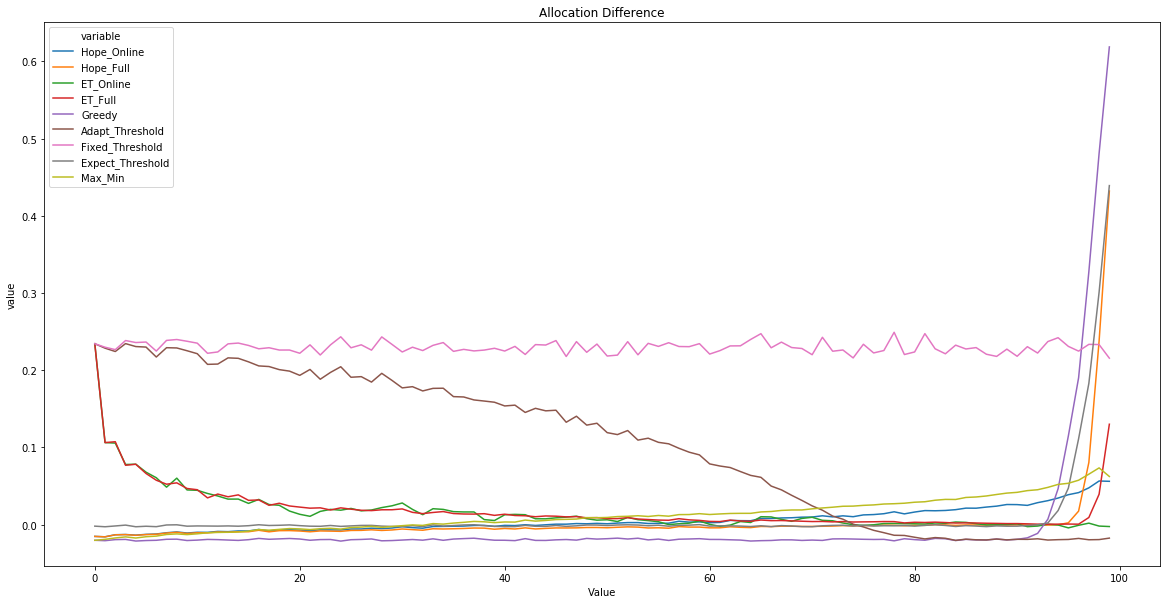

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Agent', y='value', hue = 'variable', data=df_uniform)
plt.title('Allocation Difference')
plt.xlabel('Value')